In [106]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [26]:
df = pd.read_csv('dermatology.csv')

In [27]:
df

,erythema,Scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,class label
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [28]:
df.shape

(366, 35)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   erythema                                    366 non-null    int64 
 1   Scaling                                     366 non-null    int64 
 2   definite borders                            366 non-null    int64 
 3   itching                                     366 non-null    int64 
 4   koebner phenomenon                          366 non-null    int64 
 5   polygonal papules                           366 non-null    int64 
 6   follicular papules                          366 non-null    int64 
 7   oral mucosal involvement                    366 non-null    int64 
 8   knee and elbow involvement                  366 non-null    int64 
 9   scalp involvement                           366 non-null    int64 
 10  family history            

In [30]:
df['Age'].isnull().sum()

0

In [31]:
df = df[df['Age'] != '?']

In [32]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

C:\Users\naras\AppData\Local\Temp\ipykernel_1788\1391001171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   erythema                                    358 non-null    int64
 1   Scaling                                     358 non-null    int64
 2   definite borders                            358 non-null    int64
 3   itching                                     358 non-null    int64
 4   koebner phenomenon                          358 non-null    int64
 5   polygonal papules                           358 non-null    int64
 6   follicular papules                          358 non-null    int64
 7   oral mucosal involvement                    358 non-null    int64
 8   knee and elbow involvement                  358 non-null    int64
 9   scalp involvement                           358 non-null    int64
 10  family history                        

In [34]:
df_clm = df.columns

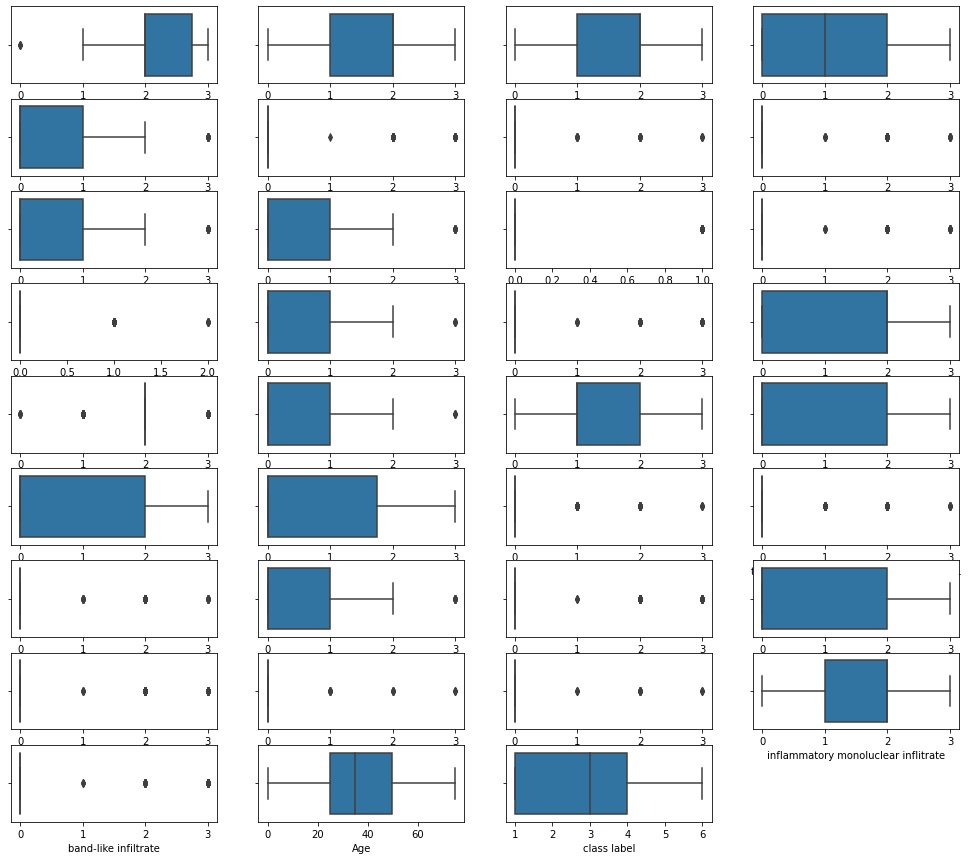

In [35]:
t=1
plt.figure(figsize = (17,15))
for i in df_clm:
    plt.subplot(9,4,t)
    sns.boxplot(df[i])
    t+=1
plt.show()    

In [36]:
# for i in df_clm:
#     q1,q3 = np.quantile(df[i],[0.25,0.75])
#     iqr = q3 - q1
#     ub = q3 + (1.5 * iqr)
#     lb = q1 - (1.5 * iqr)
#     df[i] = np.where(df[i] > ub, ub, df[i])
#     df[i] = np.where(df[i] < lb, lb, df[i])

In [37]:
# t=1
# plt.figure(figsize = (17,15))
# for i in df_clm:
#     plt.subplot(9,4,t)
#     sns.boxplot(df[i])
#     t+=1
# plt.show()   

In [38]:
df.corr()

,erythema,Scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,class label
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,...,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
Scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,...,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,...,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,...,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,...,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,...,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,...,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral mucosal involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,...,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee and elbow involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,...,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,...,0.485260,-0.257697,-0.425421,-0.262429,-0.055091,-0.020456,0.027887,-0.255333,0.036412,-0.534716


<AxesSubplot:>

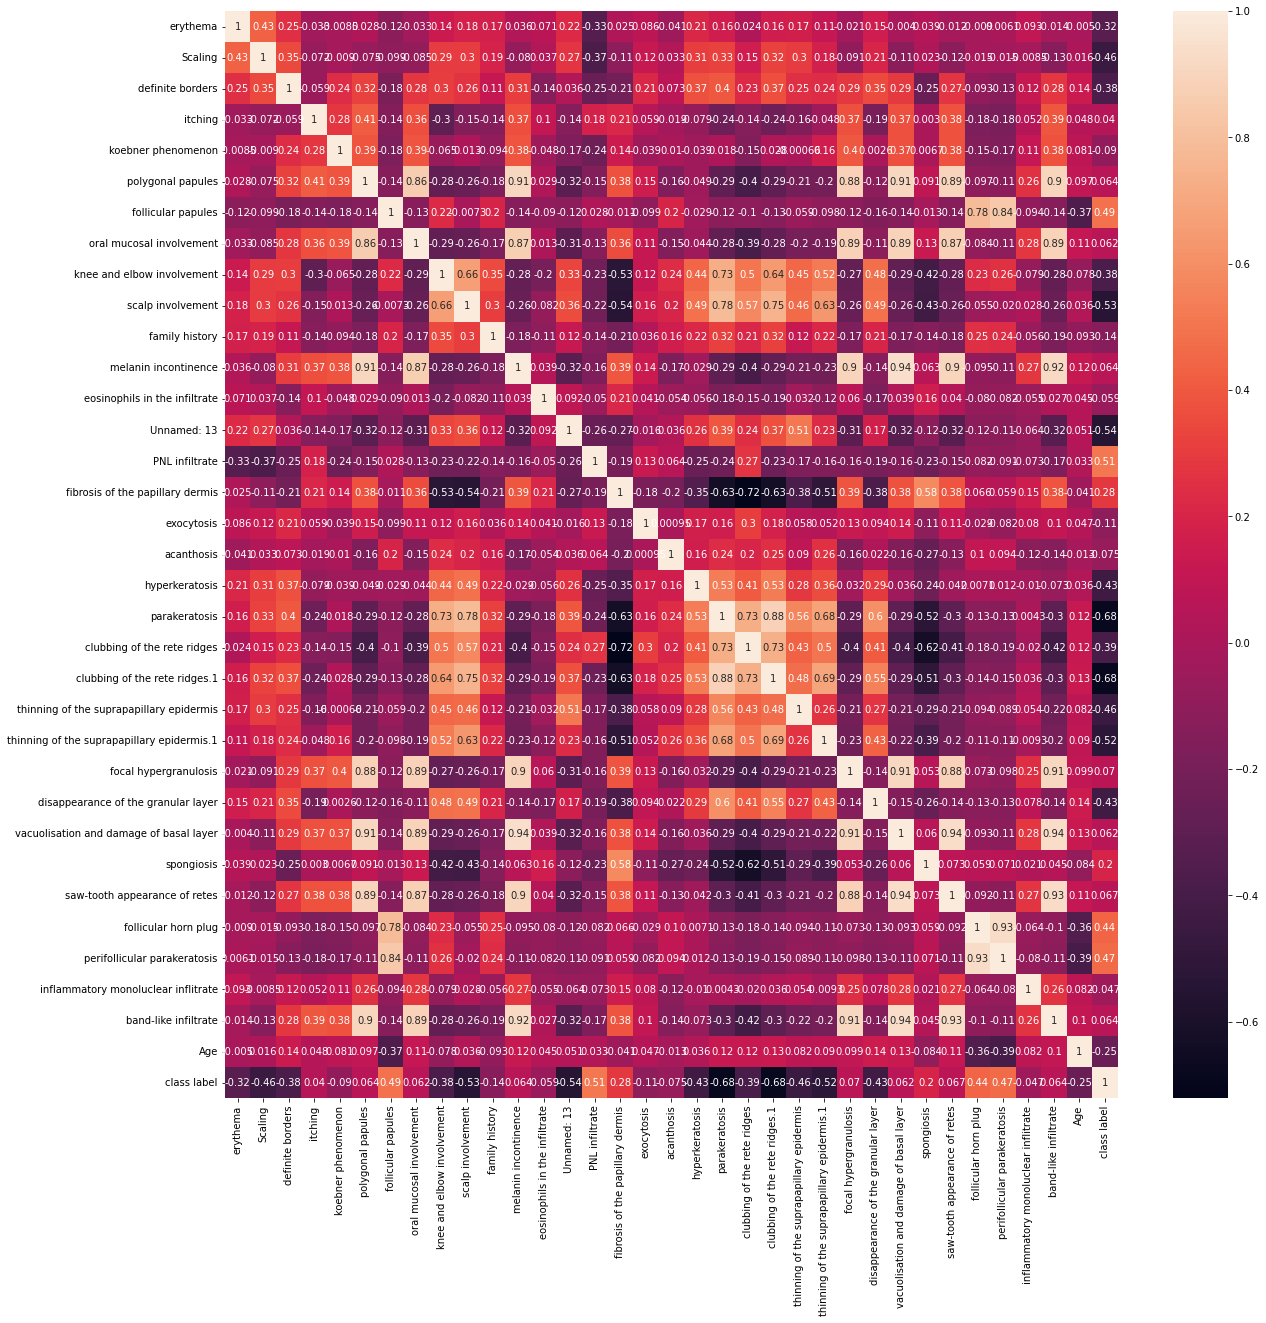

In [41]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot = True)

In [49]:
# sns.pairplot(df)

In [43]:
cov_mat = np.cov(df.T)
print(cov_mat[0:5])

[[ 0.44204497  0.19999061  0.14858457 -0.0250223  -0.00513278  0.01794908
  -0.04417633 -0.01859068  0.09120073  0.10963492  0.03797944  0.02101623
   0.01963914  0.1195249  -0.18442014  0.01870022  0.03991988 -0.02048417
   0.13149617  0.11614478  0.01812121  0.11207612  0.07739856  0.05511478
  -0.01172089  0.08880647 -0.00253509  0.02915356 -0.00791825 -0.00272288
   0.00200304  0.04325306 -0.01020296 -0.0512339  -0.34425614]
 [ 0.19999061  0.49215999  0.21937937 -0.05748556 -0.00575873 -0.0503341
  -0.03989641 -0.04982552  0.20442702  0.18941208  0.0433626  -0.04948907
   0.0107272   0.1562368  -0.2163044  -0.08279736  0.06138992  0.01756569
   0.19846486  0.24279768  0.12561226  0.23621739  0.14180085  0.09647434
  -0.05444971  0.12539317 -0.07618578  0.01829335 -0.07952678 -0.00469462
  -0.00533621 -0.00414691 -0.104909    0.1720733  -0.51269893]
 [ 0.14858457  0.21937937  0.81163639 -0.05985634  0.19629751  0.27803077
  -0.09176408  0.21149242  0.26870413  0.21493514  0.03341001

In [44]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [235.3300678    9.24592823   5.12808939   2.3148928    1.4024016
   0.91337358   0.81042609   0.71593857   0.60095368   0.55235077
   0.50813846   0.49553053   0.44101188   0.38419379   0.35734125
   0.30619828   0.26523004   0.25767359   0.23909006   0.22446452
   0.20956021   0.01308496   0.17067294   0.15233829   0.03857301
   0.05231658   0.06523876   0.06854187   0.07311938   0.08012027
   0.1130052    0.10812021   0.09245087   0.09900721   0.09605179] 

Eigenvectors: 
 
 [[-0.0001554   0.03505206  0.07095608 ... -0.02619762  0.01355569
   0.01395414]
 [ 0.00081883  0.07663563  0.08343331 ... -0.00267301 -0.05716716
   0.05304328]
 [ 0.00833426  0.05138318  0.24954831 ... -0.03640348  0.05732959
   0.07456333]
 ...
 [ 0.00769323 -0.25158777  0.31887805 ... -0.21123561  0.17993728
   0.14081111]
 [ 0.99894518 -0.01003068 -0.03549457 ... -0.0008466   0.00017205
  -0.00079763]
 [-0.02682215 -0.29906888 -0.38666106 ... -0.35272769 -0.12326693
   0.22507971]] 



In [45]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[235.33006779519386, 9.245928230012801, 5.128089388280847, 2.314892796543686, 1.4024016009885227, 0.9133735765940564, 0.8104260859712394, 0.7159385715037455, 0.6009536828739348, 0.5523507728773607, 0.5081384552739516, 0.4955305293430893, 0.4410118768284154, 0.38419378898035994, 0.35734125135657596, 0.3061982839045628, 0.26523004146976875, 0.2576735921871564, 0.2390900601961843, 0.22446452153922375, 0.20956021365882846, 0.17067294323373322, 0.15233828894391624, 0.11300519637264449, 0.10812020517926119, 0.0990072072390541, 0.09605179370302686, 0.092450871804987, 0.08012026862579272, 0.07311938359999973, 0.06854187117742573, 0.06523875545825317, 0.052316579256128856, 0.03857301361992849, 0.01308496177317094]


a) 
**Kaiser criterion** : This criterion considers the number of pricipal components for which the eigenvalue is greater than 1. This criterion suffers a drawback of selecting more number of components as the eigenvalues very close to 1 may not contribute significantly in explaining the variation in the data.
Here the first five eigenvalues are greater than 1. Thus we can consider 5 principal components using kaiser criterion.

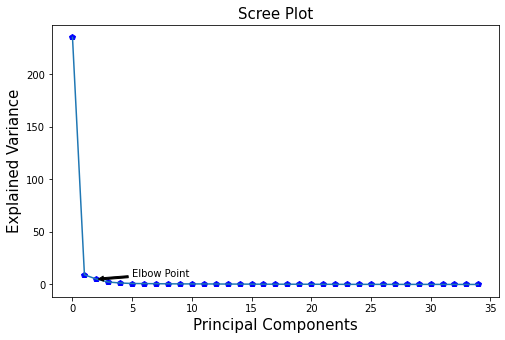

In [65]:
plt.figure(figsize=(8, 5))
plt.plot(eig_val,'bp')            
plt.plot(eig_val)
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      
plt.annotate(text='Elbow Point', xy=(2,5), xytext=(5,7), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))
plt.show() 

**Interpretation**: It can be observed that, after the elbow point, the principal components do not contribute much to the variance in the data. 
The Kaiser criterion considers the number of principal components as 5, but the scree plot shows that only first three components explains most of the variation.

In [97]:
#c Percentage of Explained Variation
percent_var = []
for i in eig_val:
    variation = (i/sum(eig_val))*100
    percent_var.append(variation)
    
print(percent_var)

[89.84618564428929,
 3.5299840432225076,
 1.9578427673805334,
 0.8837981898934364,
 0.5354200411819906,
 0.3487150311649808,
 0.30941091911177276,
 0.2733367240654256,
 0.2294368784277111,
 0.21088087274889036,
 0.19400114236689242,
 0.18918758809230837,
 0.16837302316738414,
 0.146680561525837,
 0.13642858606443348,
 0.11690281704076404,
 0.10126163548754169,
 0.09837667415889369,
 0.09128170545884401,
 0.08569785094491672,
 0.08000756569888924,
 0.06516087419640991,
 0.05816092400525799,
 0.043144022976707525,
 0.04127899217234213,
 0.03779975931279763,
 0.03667141801879588,
 0.035296629406473545,
 0.03058895361849003,
 0.027916100032057807,
 0.026168460919211628,
 0.024907371119298655,
 0.019973839875876347,
 0.014726712039074902,
 0.004995680813910661]

**Interpretation**: It can be seen that the first principal component explains 89.84% variation in the data.

In [67]:
np.cumsum(percent_var)

array([ 89.84618564,  93.37616969,  95.33401245,  96.21781064,
        96.75323069,  97.10194572,  97.41135664,  97.68469336,
        97.91413024,  98.12501111,  98.31901225,  98.50819984,
        98.67657287,  98.82325343,  98.95968201,  99.07658483,
        99.17784647,  99.27622314,  99.36750484,  99.4532027 ,
        99.53321026,  99.59837114,  99.65653206,  99.69967608,
        99.74095507,  99.77875483,  99.81542625,  99.85072288,
        99.88131184,  99.90922794,  99.9353964 ,  99.96030377,
        99.98027761,  99.99500432, 100.        ])

In [98]:
pca = PCA(n_components = 5, random_state = 10)
components = pca.fit_transform(df)

In [99]:
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,18.621655,-1.460772,-2.478290,-2.322577,-1.266360
1,-28.174714,3.529331,2.591427,-0.663806,-1.391516
2,-10.225587,-4.342322,3.415217,-0.007982,-0.429869
3,3.803523,4.939282,1.644943,-0.470654,1.374029
4,8.778375,-4.154797,3.028559,0.089421,0.573878


In [100]:
df_pca.shape

(358, 5)

*Interpretation**: In the above step, we obtained the data with reduced dimensions. 
    The new dataset has 358 observations and 5 columns, i.e. we have decreased the number of features from 33 to 5.

# K Mean clustering 

In [101]:
wcss  = []

for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

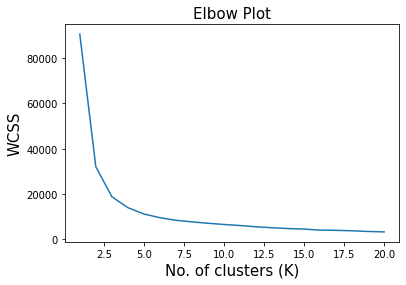

In [102]:
plt.plot(range(1,21), wcss)

plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

plt.show()

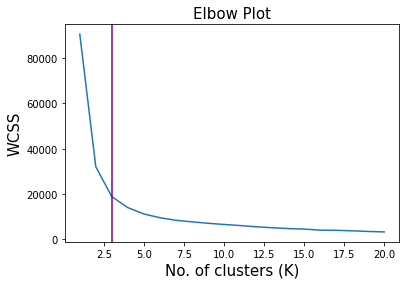

In [103]:
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 3, color = 'purple')

# display the plot
plt.show()

**Interpretation:** We can see that the for K = 3, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 3, the WCSS is decreasing slowly.

Now, let us use the silhouette score method to identify the optimal value of K.

## Optimal Value of K Using Silhouette Score

In [104]:
n_clusters = [2, 3, 4]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_pca)
    score = silhouette_score(df_pca, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.5191697623265723)
For 3 clusters the silhouette score is 0.43779531499250857)
For 4 clusters the silhouette score is 0.38576744970658744)


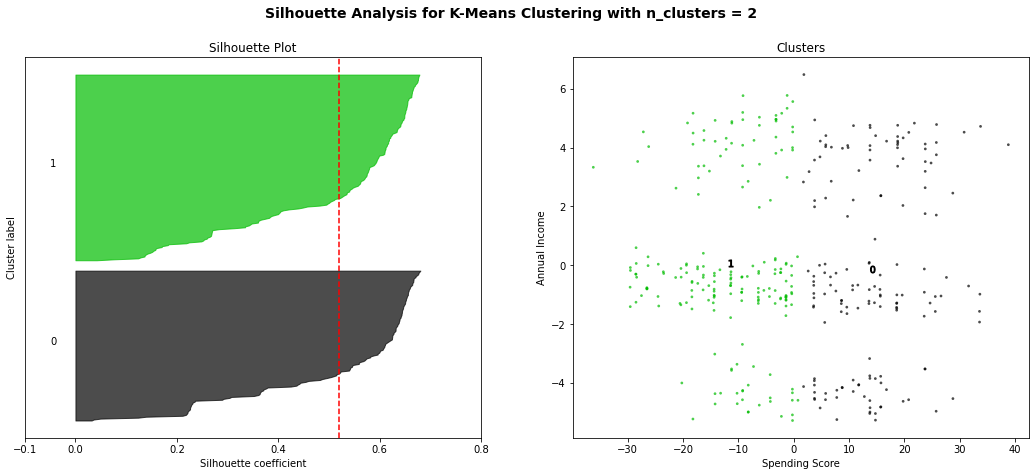

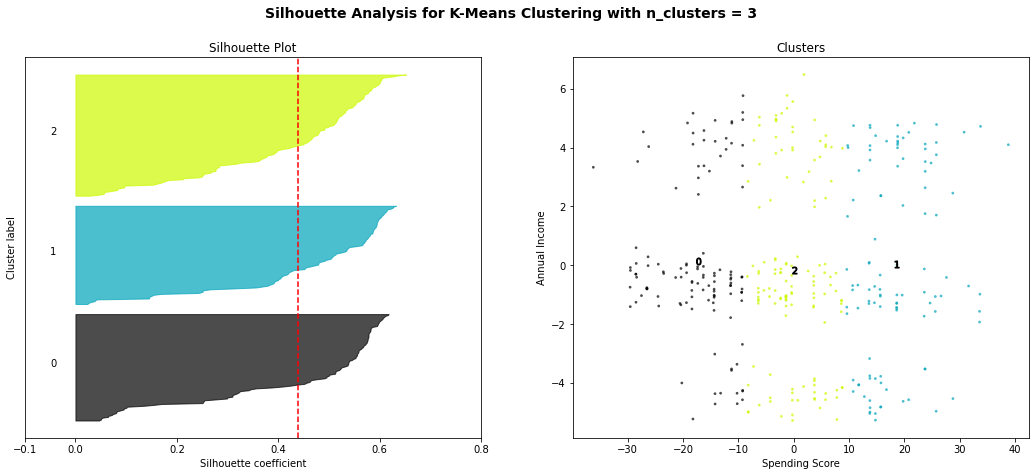

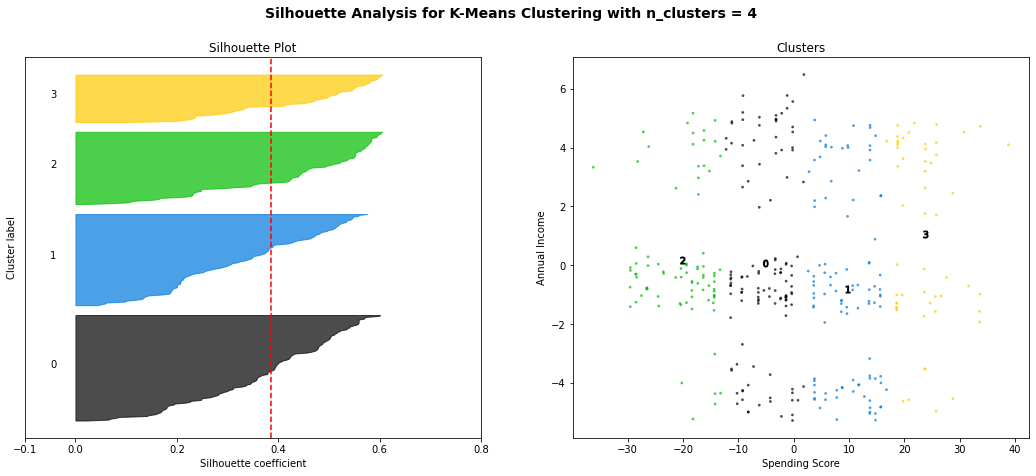

In [107]:
n_clusters = [2,3,4]
X = np.array(df_pca)

for K in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    model = KMeans(n_clusters = K, random_state = 10)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = model.cluster_centers_

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14,fontweight='bold')

plt.show()

In [108]:
# build a K-Means model with 5 clusters
new_clust = KMeans(n_clusters = 3, random_state = 10)
new_clust.fit(df_pca)
df_pca['Cluster'] = new_clust.labels_

In [109]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,Cluster
0,18.621655,-1.460772,-2.478290,-2.322577,-1.266360,1
1,-28.174714,3.529331,2.591427,-0.663806,-1.391516,0
2,-10.225587,-4.342322,3.415217,-0.007982,-0.429869,0
3,3.803523,4.939282,1.644943,-0.470654,1.374029,2
4,8.778375,-4.154797,3.028559,0.089421,0.573878,2


In [110]:
df_pca.Cluster.value_counts()

2    133
0    117
1    108
Name: Cluster, dtype: int64

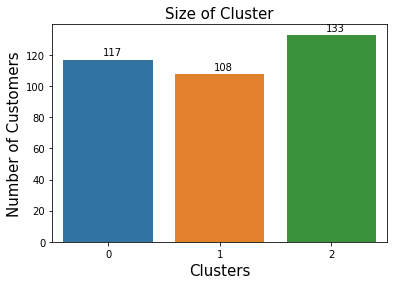

In [113]:
sns.countplot(data= df_pca, x = 'Cluster')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

plt.text(x = -0.05, y =120, s = np.unique(new_clust.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =110, s = np.unique(new_clust.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =135, s = np.unique(new_clust.labels_, return_counts=True)[1][2])

plt.show()

### Cluster 2

In [114]:
len(df_pca[df_pca['Cluster'] == 0])

117

In [115]:
df_pca[df_pca.Cluster==0].describe()

,PC1,PC2,PC3,PC4,PC5,Cluster
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,-17.214156,0.147050,-0.101684,0.030931,-0.014660,0.0
std,6.484203,2.643979,2.169630,1.583982,1.530397,0.0
min,-36.185988,-5.216786,-2.916642,-3.009619,-2.436768,0.0
25%,-20.371583,-1.055989,-1.975199,-0.984834,-1.106908,0.0
50%,-16.203222,-0.402629,-0.942475,-0.062758,-0.204593,0.0
75%,-11.370593,2.411305,2.052546,0.850162,0.749274,0.0
max,-9.145142,5.763745,4.841648,3.521551,4.158952,0.0


### Cluster 3

In [116]:
len(df_pca[df_pca['Cluster'] == 1])

108

In [117]:
df_pca[df_pca.Cluster==1].describe()

,PC1,PC2,PC3,PC4,PC5,Cluster
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.0
mean,18.497437,0.048628,-0.206381,0.134282,0.159249,1.0
std,6.449455,3.285000,2.237127,1.503778,0.939867,0.0
min,9.595671,-5.255957,-4.359619,-2.833962,-1.849703,1.0
25%,13.766860,-1.774869,-2.488028,-0.760424,-0.614765,1.0
50%,16.771569,-0.764789,0.428883,0.121590,0.263227,1.0
75%,23.721249,3.587507,1.379537,0.845071,0.942149,1.0
max,38.774204,4.830898,3.761979,3.626998,1.800975,1.0


### Cluster 4

In [118]:
len(df_pca[df_pca['Cluster'] == 2])

133

In [119]:
df_pca[df_pca.Cluster==2].describe()

,PC1,PC2,PC3,PC4,PC5,Cluster
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.0
mean,0.122805,-0.168847,0.257039,-0.136251,-0.116418,2.0
std,4.814646,3.172617,2.359022,1.479353,0.991963,0.0
min,-8.368177,-5.267542,-3.531863,-3.175788,-2.609816,2.0
25%,-3.325839,-1.418854,-1.973046,-1.004968,-0.871150,2.0
50%,-0.374583,-0.677704,0.337039,-0.141694,0.066852,2.0
75%,3.774034,2.831841,2.238309,0.556180,0.589770,2.0
max,8.809992,6.480041,4.306348,3.710399,1.543585,2.0
